<a href="https://colab.research.google.com/github/costaljorge/CLUSTERS/blob/main/CLUSTERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd

# Substitua 'caminho/do/seu/arquivo.xlsx' pelo caminho do seu arquivo xlsx
df = pd.read_excel('/content/IMC.xlsx')
df.head(10)

,Sexo,Idade,Altura,Peso,IMC,Nível de Atividade Física,Histórico Familiar,Doenças Presentes,Status
0,Masculino,13,1.68,75.46,26.74,Baixo,Ausente,Presente,Sobrepeso
1,Masculino,36,1.78,52.86,16.68,Moderado,Ausente,Presente,Abaixo peso
2,Feminino,31,1.80,110.59,34.13,Alto,Presente,Presente,Obesidade
3,Feminino,28,1.61,45.03,17.37,Moderado,Presente,Ausente,Abaixo peso
4,Feminino,29,1.71,60.66,20.74,Baixo,Ausente,Ausente,Peso Normal
5,Masculino,50,1.87,100.89,28.85,Moderado,Ausente,Presente,Sobrepeso
6,Feminino,28,1.68,100.16,35.49,Baixo,Ausente,Ausente,Obesidade
7,Feminino,26,1.75,77.44,25.29,Baixo,Ausente,Ausente,Sobrepeso
8,Masculino,46,1.85,61.93,18.09,Alto,Presente,Presente,Abaixo peso
9,Feminino,33,1.97,69.61,17.94,Moderado,Presente,Ausente,Abaixo peso


In [74]:
from sklearn.preprocessing import LabelEncoder

# Identificar as colunas do tipo 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Aplicar o LabelEncoder para cada coluna do tipo 'object'
label_encoder = LabelEncoder()
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head(10)

,Sexo,Idade,Altura,Peso,IMC,Nível de Atividade Física,Histórico Familiar,Doenças Presentes,Status
0,1,13,1.68,75.46,26.74,1,0,1,3
1,1,36,1.78,52.86,16.68,2,0,1,0
2,0,31,1.80,110.59,34.13,0,1,1,1
3,0,28,1.61,45.03,17.37,2,1,0,0
4,0,29,1.71,60.66,20.74,1,0,0,2
5,1,50,1.87,100.89,28.85,2,0,1,3
6,0,28,1.68,100.16,35.49,1,0,0,1
7,0,26,1.75,77.44,25.29,1,0,0,3
8,1,46,1.85,61.93,18.09,0,1,1,0
9,0,33,1.97,69.61,17.94,2,1,0,0


In [75]:
# Verificar se existem dados faltantes
missing_data = df.isnull().sum()
print(missing_data)


Sexo                         0
Idade                        0
Altura                       0
Peso                         0
IMC                          0
Nível de Atividade Física    0
Histórico Familiar           0
Doenças Presentes            0
Status                       0
dtype: int64


In [76]:
# Verificar se existem dados duplicados
duplicated_data = df.duplicated().sum()
print("Número de linhas duplicadas:", duplicated_data)


Número de linhas duplicadas: 0


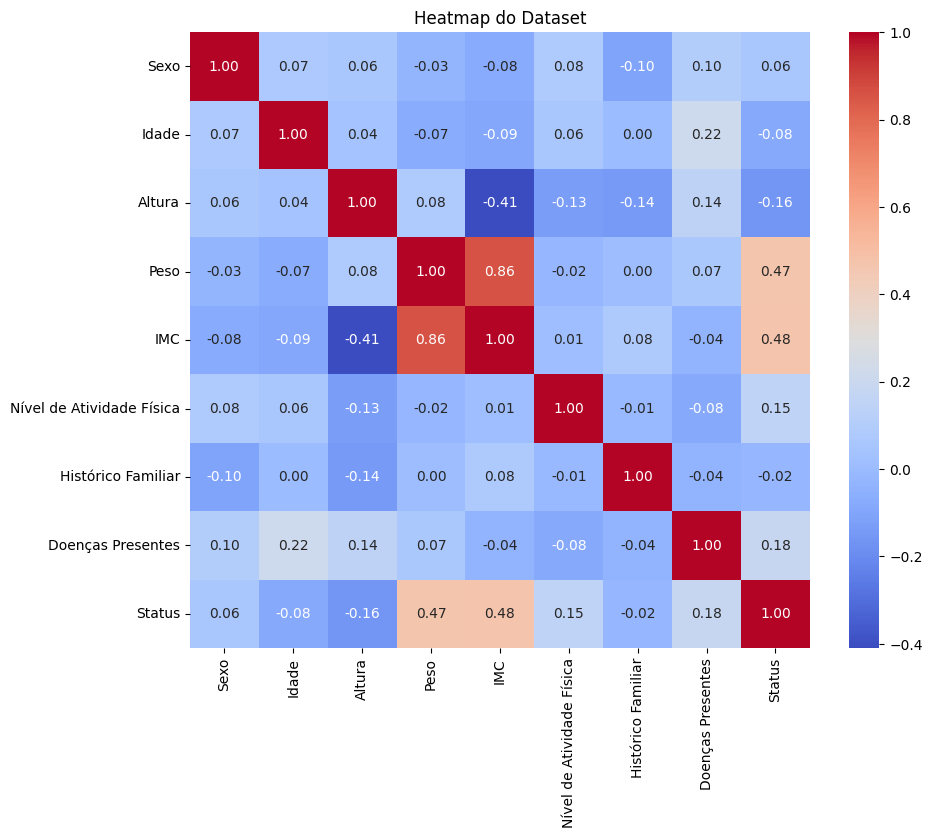

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap do Dataset')
plt.show()


In [78]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar o dataset
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head(10)

,Sexo,Idade,Altura,Peso,IMC,Nível de Atividade Física,Histórico Familiar,Doenças Presentes,Status
0,1.00,0.00,0.36,0.51,0.60,0.50,0.00,1.00,1.00
1,1.00,0.43,0.56,0.31,0.33,1.00,0.00,1.00,0.00
2,0.00,0.34,0.60,0.82,0.81,0.00,1.00,1.00,0.33
3,0.00,0.28,0.22,0.24,0.35,1.00,1.00,0.00,0.00
4,0.00,0.30,0.42,0.38,0.44,0.50,0.00,0.00,0.67
5,1.00,0.70,0.74,0.73,0.66,1.00,0.00,1.00,1.00
6,0.00,0.28,0.36,0.73,0.84,0.50,0.00,0.00,0.33
7,0.00,0.25,0.50,0.53,0.56,0.50,0.00,0.00,1.00
8,1.00,0.62,0.70,0.39,0.37,0.00,1.00,1.00,0.00
9,0.00,0.38,0.94,0.46,0.36,1.00,1.00,0.00,0.00


In [79]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Selecionar as variáveis com maior correlação com a variável de destino (Status)
best_features = correlation_matrix['Status'].sort_values(ascending=False).index[:3]

# Selecionar apenas as melhores variáveis para o modelo
df_selected_features = df_normalized[best_features]
df_selected_features.head(10)

,Status,IMC,Peso
0,1.00,0.60,0.51
1,0.00,0.33,0.31
2,0.33,0.81,0.82
3,0.00,0.35,0.24
4,0.67,0.44,0.38
5,1.00,0.66,0.73
6,0.33,0.84,0.73
7,1.00,0.56,0.53
8,0.00,0.37,0.39
9,0.00,0.36,0.46


In [86]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Criar os modelos de clusterização
kmeans = KMeans(n_clusters=3, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Lista de modelos
models = [("KMeans", kmeans), ("Agglomerative", agglomerative)]

# Função para avaliar os modelos e imprimir os scores
def evaluate_models(models, X):
    for name, model in models:
        model.fit(X)
        if hasattr(model, 'labels_'):
            labels = model.labels_
        else:
            labels = model.predict(X)
        silhouette = silhouette_score(X, labels)
        print(f"{name}: Silhouette Score = {silhouette}")

# Chamar a função para avaliar os modelos
evaluate_models(models, df_selected_features)


KMeans: Silhouette Score = 0.645109139445917
Agglomerative: Silhouette Score = 0.6816938496025865


In [87]:
import plotly.express as px

# Adicionar os rótulos dos clusters ao DataFrame original
for name, model in models:
    if hasattr(model, 'labels_'):
        df[name + '_Cluster'] = model.labels_
    else:
        df[name + '_Cluster'] = model.predict(df_selected_features)

# Plotar um gráfico interativo com os clusters para cada modelo
for name, _ in models:
    fig = px.scatter_3d(df, x=best_features[0], y=best_features[1], z=best_features[2], color=name + '_Cluster', title=f'Clusters {name}')
    fig.show()
